### Análise Exploratoria

 A analise tem como objetivo coletar informações nos dados do dataset teste_indicium_precificacao.csv. Diante disso, será observado features para a construção de um modelo que preveja preços de alugues de moveis por temporada em Nova York.

1- Começamos o processo de análise instalando a biblioteca pandas para manipular e analisar dados de forma eficiente e intuitiva. 



In [45]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import pandas as pd

2- Apos isso vamos carregar arquivo para a visualização dos dados.

In [47]:
# Carregar o arquivo CSV
df_precificação = pd.read_csv('teste_indicium_precificacao.csv')

# Exibir as primeiras linhas do DataFrame
df_precificação.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


3- Da pra perceber linhas com NaN que significa Not a Number. Vamos retirar essas linhas com os NaNs. Perceba que a segunda linha foi removida da planilha.

In [48]:
#Remoção de linhas com NaN
df_precificação = df_precificação.dropna()
df_precificação.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


4- Vamos visualizar as informações dos dados. Aqui podemos perceber quantas colunas os dados possuem, o tipo dos dados entre outras informações.

In [49]:
#Visualizaçao das informaçoes do dataset
df_precificação.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48851
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38820 non-null  int64  
 1   nome                           38820 non-null  object 
 2   host_id                        38820 non-null  int64  
 3   host_name                      38820 non-null  object 
 4   bairro_group                   38820 non-null  object 
 5   bairro                         38820 non-null  object 
 6   latitude                       38820 non-null  float64
 7   longitude                      38820 non-null  float64
 8   room_type                      38820 non-null  object 
 9   price                          38820 non-null  int64  
 10  minimo_noites                  38820 non-null  int64  
 11  numero_de_reviews              38820 non-null  int64  
 12  ultima_review                  38820 non-null  obje

5- Agora vamos coletar informações de algumas features (caracteristicas) que julgo importante para a criação do modelo.
Aqui vamos responder algumas perguntas necessarias para entender como podemos criar um modelo para prever preços de alugueis por temporada de acordo com o dataset em questão.
### Perguntas:
1 Quais bairros foram utilizados?

2 Qual bairro obteve maiores reservas?

3 Quais os tipos de rooms_types e qual o com maiores reservas?

4 Qual o maximo e minino da coluna minimo_noites e qual sua media?

5 Qual o maximo e o minimo das colunas latitude e longitude?

6 Qual o maximo, minimo e a media da coluna disponibilidade_365?

7 Qual a media dos preços dos imoveis de alugueis por temporada?


5.1 - Vamos começar com a coluna bairro_group. Quais são os bairros utilizados nos dados? Vamos descobrir tambem qual bairro mais procurado para as reservas.

In [50]:
#Visualizar quais grupos estão no dataset
df_precificação["bairro_group"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [51]:
#Visualizar uma escala de escolha dos bairros e a quantidade
df_precificação["bairro_group"].value_counts()

bairro_group
Manhattan        16621
Brooklyn         16438
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

5.1.1 - Perceba que estamos trabalhando com cinco bairros os quais são os considerados os mais caros sendo Manhattan o mais procurado e tambem o mais caro da lista.

5.2 - Agora vamos avaliar a coluna room_type. Quantos opções de quarto estão disponiveis e qual a escolha mais recorrente?

In [52]:
#Visualizar quais rooms estão no dataset
df_precificação["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [53]:
#Visualizar uma escala de esolha dos rooms e a quantidade
df_precificação["room_type"].value_counts()

room_type
Entire home/apt    20321
Private room       17653
Shared room          846
Name: count, dtype: int64

5.2.1 - Perceba que estamos trabalhando com três opções sendo o Entire home/apt o mais procurado.

5.3 - Agora vamos observar o maximo e o minimo dos valores das colunas minimo de noites, latitude, longitude e disponibilidade 365 e suas medias e tambem vamos analizar a media dos preços dos alugueis.

In [54]:
#Visualizar o maximo de noites utilizadas
df_precificação["minimo_noites"].max()

np.int64(1250)

In [55]:
#Visualizar o minimo de noites permitidas
df_precificação["minimo_noites"].min()

np.int64(1)

In [56]:
#Media de noites
df_precificação["minimo_noites"].mean().astype(int)

np.int64(5)

In [57]:
#Visualizar o maximo de latitude utilizada
df_precificação["latitude"].max().astype(int)

np.int64(40)

In [58]:
#Visualizar o minimo de latitude permitida
df_precificação["latitude"].min()

np.float64(40.50641)

In [59]:
#Visualizar o maximo de longitude utilizada
df_precificação["longitude"].max()

np.float64(-73.71299)

In [60]:
#Visualizar o minimo de latitude permitida
df_precificação["longitude"].min()

np.float64(-74.24442)

In [61]:
#Visualizar o maximo de disponibilidade utilizada
df_precificação["disponibilidade_365"].max()

np.int64(365)

In [62]:
#Media de disponibilidade dos alugueis
df_precificação["disponibilidade_365"].mean().astype(int)

np.int64(114)

In [63]:
#Visualizar o minimo de disponibilidade permitida
df_precificação["disponibilidade_365"].min()

np.int64(0)

In [64]:
#Media dos preços dos alugueis.
df_precificação["price"].mean().astype(int)

np.int64(142)

### Perguntas relacionadas a analise dos dados
1 Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

2 O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

3 Existe algum padrão no texto do nome do local para lugares de mais alto valor?


### Respostas
1 O local de investimento em relação ao dataset depende do que o cliente busca e quais suas condições de investimento. Para a analise descobrimos que Manhatan é destino escolhido por uma boa parte dos compradores.

2 De acordo com o dataset, o que interfere nos valores são os nomes dos moveis com suas caracteristicas e o minimo numero de noites ja disponibilidade não interfere.

3 Sim! Se estiver escrito que é um "castelo" ou "luxuoso" os valores são mais altos.

_______________________________________________________________________________________________________________________________________________________

### Desenvolvimento do Modelo - Regressão Linear

O proximo passo é desenvolver um modelo que preveja preços dos alugueis de acordo com as features que escolhi para trabalhar no modelo.

1 - Vamos começar importando as bibliotecas necessarias.

In [65]:
!pip install matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
!pip install seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
!pip install scikit-learn




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [83]:
!pip install pipreqs


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


2 - Agora vamos criar um novo dataset com as features escolhidas para o modelo.

In [69]:
#Gerar dados com comportamentos linear forte
np.random.seed(42) #para reproduzir os resultados
bairros_group = ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'] #5 bairros mais populares
latitude = np.random.uniform(40.49979, 40.91306, 100) #Definição de maximo, minimo e a quantidade de amostras
longitude = np.random.uniform(-74, -73, 100) #Definição de maximo, minimo e a quantidade de amostras
room_type =['Entire home/apt', 'Private room', 'Shared room'] #5 tipos de rooms
minimo_noite = np.random.uniform(1, 1250, 100) #Definição de maximo, minimo e a quantidade de amostras
dispoibilidade_365 = np.random.uniform(0, 365, 100) #Definição de maximo, minimo e a quantidade de amostras


# Definir os coeficientes para uma relação linear mais realista
coef_bairros_goup = 50  # Coeficiente para o bairro
coef_latitude = 10  # Coeficiente para a latitude
coef_longitude = -50  # Coeficiente para a longitude
coef_minimo_noite = 10  # Coeficiente para o mínimo de noites
coef_dispoibilidade_365 = 0.1  # Coeficiente para a disponibilidade anual
intercept = 100  # Intercept

# Definição de como o modelo calculara os valores
price = (intercept + 
         coef_bairros_goup + 
         coef_latitude * latitude + 
         coef_longitude * longitude + 
         coef_minimo_noite * minimo_noite + 
         coef_dispoibilidade_365 * dispoibilidade_365)


#É necessario trasnformar algumas colunas categoricas em numeros ou valores booleanos (True ou False), pois os modelos são matematicos em sua construção.
#Vamos fazer isso a seguir

#Criar o dataframe
df_precificação = pd.DataFrame({ 
    "latitude": latitude, 
    "longitude": longitude, 
    'minimo_noite': minimo_noite, 
    'disponibilidade_365': dispoibilidade_365,
    'bairros_group': np.random.choice(bairros_group, size=100), 
    'room_type': np.random.choice(room_type, size=100)
})


df_precificação = pd.get_dummies(df_precificação, columns = ['bairros_group', 'room_type']) #get_dummies é uma função da biblioteca pandas que transforma dados categorios em numericos
df_precificação['price'] = price
df_precificação['price'] = df_precificação['price'].round().astype(int) #astype.(int) #trasnformará os dados em numeros inteiros.

colunas_numericas = [ 'minimo_noite', 'disponibilidade_365']


df_precificação[colunas_numericas] = df_precificação[colunas_numericas].apply(lambda x: x.astype(int)) #As colunas numericas chamadas logo acima foram transformadas em numeros inteiros nessa parte do codigo.

df_precificação.head()

#Com a trasformação foram criadas 8 colunas com valores booleanos para que o modelo relacione melhor os dados.

,latitude,longitude,minimo_noite,disponibilidade_365,bairros_group_Bronx,bairros_group_Brooklyn,bairros_group_Manhattan,bairros_group_Queens,bairros_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
0,40.654576,-73.968571,802,18,False,False,True,False,False,True,False,False,12286
1,40.892692,-73.363590,106,193,False,False,True,False,False,False,False,True,5307
2,40.802301,-73.685644,202,197,False,False,True,False,False,True,False,False,6291
3,40.747198,-73.491429,1123,232,False,False,False,False,True,False,True,False,15488
4,40.564268,-73.092434,758,265,False,False,True,False,False,True,False,False,11821


3 - É necessario um pre-processamento dos dados. Vou utilizar a escala Min-Max. Essa tecnica é uma normalização dos dados para que os valores da lista fiquem em um intervalo entre 0 e 1, e dessa forma melhorando os resultados. 

In [70]:
df_minmax= MinMaxScaler()
df_precificação_normalização = df_minmax.fit_transform(df_precificação)
column_names = df_precificação.columns 
df_precificação_normalização = pd.DataFrame(df_precificação_normalização, columns=column_names)
df_precificação_normalização.head()

,latitude,longitude,minimo_noite,disponibilidade_365,bairros_group_Bronx,bairros_group_Brooklyn,bairros_group_Manhattan,bairros_group_Queens,bairros_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
0,0.376025,0.025010,0.646341,0.036517,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.646628
1,0.963140,0.643159,0.080488,0.528090,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.078120
2,0.740267,0.314095,0.158537,0.539326,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.158276
3,0.604399,0.512536,0.907317,0.637640,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.907462
4,0.153354,0.920216,0.610569,0.730337,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.608749


3.1 - Vamos observar os resultados dos dados apos a normalização em um grafico utilizando da biblioteca sns e plt. Utilizando o bairro mais procurado como variavel junto com o minimo de noite. O preço esta como principal argumento no codigo , pois podemos perceber como ele varia de acordo com as variaveis utilizadas. Podemos perceber que a medida que o minimo de noite aumenta o valor tambem aumenta.

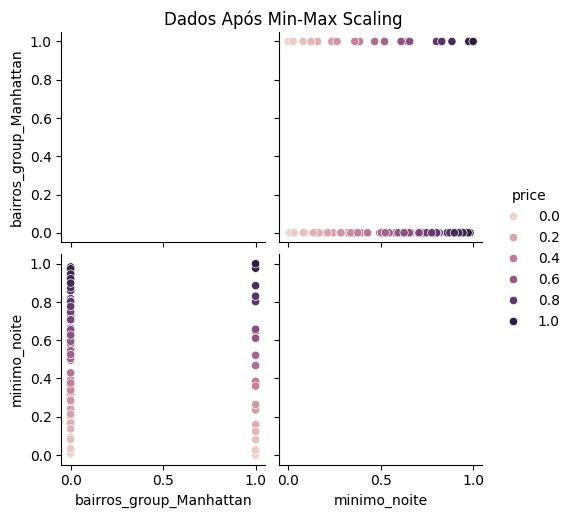

In [71]:
sns.pairplot(df_precificação_normalização, hue='price', diag_kind='kde',vars=['bairros_group_Manhattan', 'minimo_noite'])
plt.suptitle("Dados Após Min-Max Scaling", y=1.02)
plt.show()

3.1.1 - Vamos observar o coficiente de relação entre minimo de noite e o preço. O resultado mostra uma relação forte.

In [72]:
# Calculando o coeficiente de correlação entre 'minimo_noite' e 'price'
correlation_coefficient = df_precificação_normalização['minimo_noite'].corr(df_precificação_normalização['price'])

# Imprimindo o coeficiente de correlação
print(f"Correlação entre minimo_noite e o price: {correlation_coefficient}")


Correlação entre minimo_noite e o price: 0.9999879187378581


3.2 - Vamos separar os dados e treinar o modelo.

In [73]:
#Separando os dados de X e y
X = df_precificação_normalização[['latitude', 'longitude', "minimo_noite", "disponibilidade_365", 
                                 'bairros_group_Bronx', 'bairros_group_Brooklyn', 'bairros_group_Manhattan',
                                 'bairros_group_Queens', 'bairros_group_Staten Island',
                                 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']] 
y = df_precificação_normalização['price']
#Criando uma regressão linear
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [74]:
#Previsão do valor do imóvel com base nos dados coletados
previsão = model.predict(X)
previsão

array([6.46294297e-01, 7.85593450e-02, 1.57965408e-01, 9.07665955e-01,
       6.08831069e-01, 4.53870653e-03, 9.61834716e-02, 6.66367656e-01,
       2.01805098e-04, 1.57285556e-01, 5.51816488e-01, 6.97381187e-01,
       6.53369395e-01, 2.21376539e-01, 7.17813609e-01, 2.33425882e-01,
       3.22483854e-01, 7.52764209e-01, 6.51311801e-01, 8.55816511e-01,
       6.61033323e-01, 5.69744204e-01, 8.89373203e-02, 3.68041026e-01,
       2.65347615e-01, 2.42039691e-01, 9.81823696e-01, 3.91290426e-01,
       9.02529324e-01, 6.34279846e-01, 8.01347973e-01, 5.05807169e-01,
       5.79726500e-01, 4.93916724e-01, 1.88317117e-01, 7.27544255e-01,
       2.79295784e-01, 1.73666753e-02, 6.50341050e-01, 1.70234182e-01,
       9.47579699e-01, 9.64324057e-01, 9.22413693e-01, 3.70369012e-01,
       9.29819006e-03, 9.39625789e-01, 4.28137356e-01, 9.75211659e-01,
       9.74691434e-01, 8.61959875e-01, 2.90746531e-01, 3.86491444e-01,
       8.61176027e-01, 3.14300888e-01, 1.62050079e-01, 5.61037252e-01,
      

In [75]:
#Codigo para o treinamento. Escolha de 70 de teste e 30 de treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
model.fit(X_train, y_train)
#Prevendo o conjunto de testes
y_pred = model.predict(X_test)


3.3 - Resultados

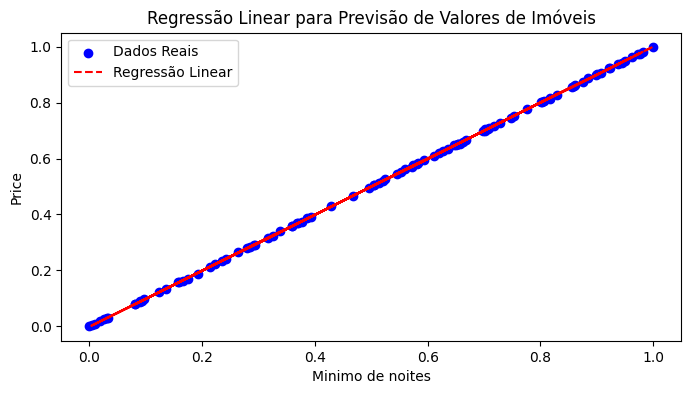

In [76]:
#Visualizar resultado
plt.figure(figsize=(8,4))
plt.scatter(df_precificação_normalização['minimo_noite'], df_precificação_normalização['price'], color='b', label='Dados Reais')

#Trancar a reta de regressão
z = np.polyfit(df_precificação_normalização['minimo_noite'], previsão, 1)
p = np.poly1d(z)
plt.plot(df_precificação_normalização['minimo_noite'], p(df_precificação_normalização['minimo_noite']), "r--", label='Regressão Linear')

plt.xlabel('Minimo de noites')
plt.ylabel('Price')
plt.title('Regressão Linear para Previsão de Valores de Imóveis')
plt.legend()
plt.show()

Perceba que de acordo com o aumento de numero de noites, o preço do aluguel aumenta. O grafico nos mostra uma linha reta e os dados reais bem proximos a linha, o que indica que a relação entre as variaveis é forte. Do gráfico podemos ter algumas sugestões de valores com o minimo de noites. 

In [77]:
#Avaliação do modelo
r2 = r2_score(y, previsão)
mse = mean_squared_error(y, previsão)  
rmse = np.sqrt(mse)  
print(f"R²: {r2}")
print(f"RMSE: {rmse}")

R²: 0.9999994507548373
RMSE: 0.00022013283006013505


### Explicação
O modelo utilizado foi regressão linear, pois é uma otima escolha quando se quer prever preços de imoveis. Utilizei algumas features que julguei mais importante para trabalhar o modelo (bairros_group,minimo de noite, latitude, longitude,room type e disponibilidade 365). Para avaliar o modelo utilizei o mean squared error que mede a media dos quadrados das diferenças entre os valores previstos e valores reais e tambem o R-squared que mede a proporção da variança dos dados onde a variação esta entre 0 e 1, onde 1 indica um modelo perfeito.
O modelo em questão foi escolhido devido a sua simplicidade e facilidade de implementação, além de ser interpretável e trasnparente, pois cada efeito da variavel sobre o resultado pode ser observado e o ajuste do aos dados pode ser avaliado. Em compensação o modelo pode ser propenso a overfitting (Adpatação em demasia aos dados de treinamento e não consegue fazer novas previsões) ou underfitting( Quando o modelo é muito simples para capturar os padrões dos dados de treinamento) o que pode levar a uma baixa generalização do modelo. Além disso é um modelo restritivo e irreal, pois como assume a relação linear entra as variaveis, os erros normalmente são distribuidos e independentes, e a variancia dos erros é constante. Contudo é uma opção considerável para os objetivos em questão.

_________________________________________________________________________________________________________________________________________________________

### Qual preço?

Supondo um apartamento com as seguintes características:

{'id': 2595,

'nome': 'Skylit Midtown Castle',
 
 'host_id': 2845,
 
 'host_name': 'Jennifer',
 
 'bairro_group': 'Manhattan',
 
 'bairro': 'Midtown',
 
 'latitude': 40.75362,
 
 'longitude': -73.98377,
 
 'room_type': 'Entire home/apt',
 
 'minimo_noites': 1,
 
 'numero_de_reviews': 45,
 
 'ultima_review': '2019-05-21',
 
 'reviews_por_mes': 0.38,
 
 'calculado_host_listings_count': 2,
 
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?


De acordo com o modelo podemos utilizar algumas features para prever o valor. Vou utilizar bairro_group, latitude, longitude, room_type, minimo de noites e disponibilidade 365.

In [78]:
#Gerar dados com comportamentos linear forte
np.random.seed(42) #para reproduzir os resultados
bairros_group = ['Manhattan'] # bairro
latitude = np.random.uniform(40.75362,40.75362,1)
longitude = np.random.uniform( -73.8377,-73.8377, 1)
room_type =['Entire home/apt']
minimo_noite = np.random.uniform(1, 1,1)
dispoibilidade_365 = np.random.uniform(355,355, 1)


# Definir os coeficientes para uma relação linear mais realista
coef_bairros_goup = 1  # Coeficiente para o bairro
coef_latitude = 0 # Coeficiente para a latitude
coef_longitude = 0 # Coeficiente para a longitude
coef_minimo_noite =0  # Coeficiente para o mínimo de noites
coef_dispoibilidade_365 = 0.1  # Coeficiente para a disponibilidade anual
intercept = 1  # Intercept

# Gerar o valor do imóvel com ruído mínimo
price = (intercept + 
         coef_bairros_goup + 
         coef_latitude * latitude + 
         coef_longitude * longitude + 
         coef_minimo_noite * minimo_noite + 
         coef_dispoibilidade_365 * dispoibilidade_365)

#Criar o dataframe
df_precificação_sugestão = pd.DataFrame({ 
    "latitude": latitude, 
    "longitude": longitude, 
    'minimo_noite': minimo_noite, 
    'disponibilidade_365': dispoibilidade_365,
    'bairros_group': np.random.choice(bairros_group, size=1), 
    'room_type': np.random.choice(room_type, size=1)
})


df_precificação_sugestão = pd.get_dummies(df_precificação_sugestão, columns = ['bairros_group', 'room_type'])
df_precificação_sugestão['price'] = price
df_precificação_sugestão['price'] = df_precificação_sugestão['price'].round().astype(int)

colunas_numericas = [ 'minimo_noite', 'disponibilidade_365']


df_precificação_sugestão[colunas_numericas] = df_precificação_sugestão[colunas_numericas].apply(lambda x: x.astype(int))


df_precificação_sugestão.head()


,latitude,longitude,minimo_noite,disponibilidade_365,bairros_group_Manhattan,room_type_Entire home/apt,price
0,40.75362,-73.8377,1,355,True,True,38


A sugestao de preço seria 38 dolares.

In [79]:
# Salvar o modelo em um arquivo .pkl
with open('Teste_Indicium_Analise_e_Modelo.pkl', 'wb') as file:
    pickle.dump(model, file)

In [82]:
pip install pipreqs



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\samsung\Downloads
